In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb; sb.set_style( 'darkgrid' )
from numpy.random import SeedSequence, default_rng

rng = default_rng( SeedSequence().entropy )

import warnings
warnings.filterwarnings("ignore")

#### First some warm up tasks. When in doubt, the help() function is your friend.

#### 1- Create Gaussian, Exponential and Cauchy random variable vectors of length $n$. For each vector, plot $\frac{\sum_i^k x_i}{k}, k=1..n$. When does the sequence stabilizes and what can you observe?

#### ( Do not go $n \geq 1000000$ if you want to save time. )

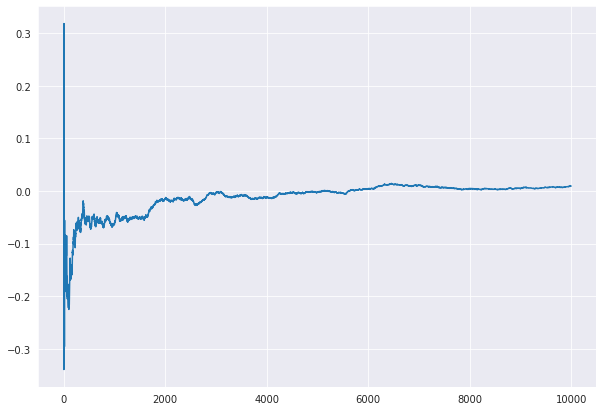

In [2]:
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.stats import expon

n = 10000

Grv = norm.rvs( size = n, random_state = rng )
Crv = cauchy.rvs( size = n, random_state = rng )
Erv = expon.rvs( size = n, random_state = rng )

a = []
for i in range(len(Grv)): 
    if i == 0: a.append( sum( Grv[ :i ] )/ 1 )
    else: a.append( sum( Grv[ :i ] )/ i )

plt.figure( figsize=( 10, 7 ) )
plt.plot( a )
plt.show()

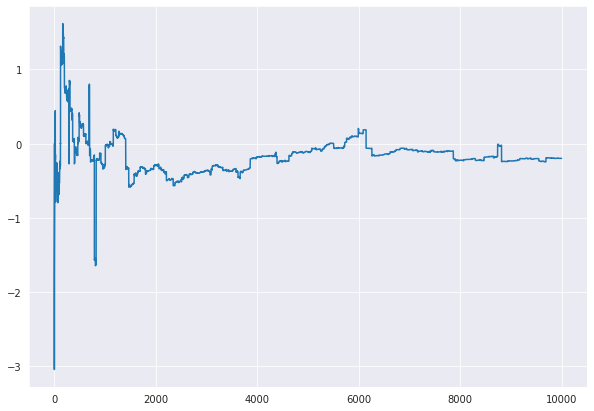

In [3]:
b = []
for i in range(len(Crv)): 
    if i == 0: b.append( sum( Crv[ :i ] )/ 1 )
    else: b.append( sum( Crv[ :i ] )/ i )
        
plt.figure( figsize=( 10, 7 ) )
plt.plot( b )
plt.show()

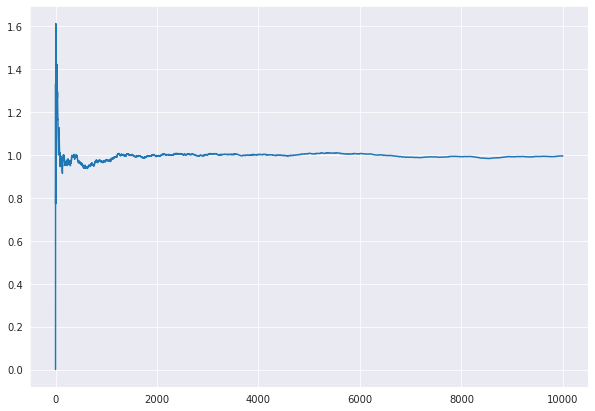

In [4]:
c = []
for i in range(len(Erv)): 
    if i == 0: c.append( sum( Erv[ :i ] )/ 1 )
    else: c.append( sum( Erv[ :i ] )/ i )
        
plt.figure( figsize=( 10, 7 ) )
plt.plot( c )
plt.show()

#### 2- Create two vectors of Gaussian random variables and perform a linear regression, using scipy.stats.linregress. Perform the regression, for example, 1000 times and plot the correlation coffecients and p-values.

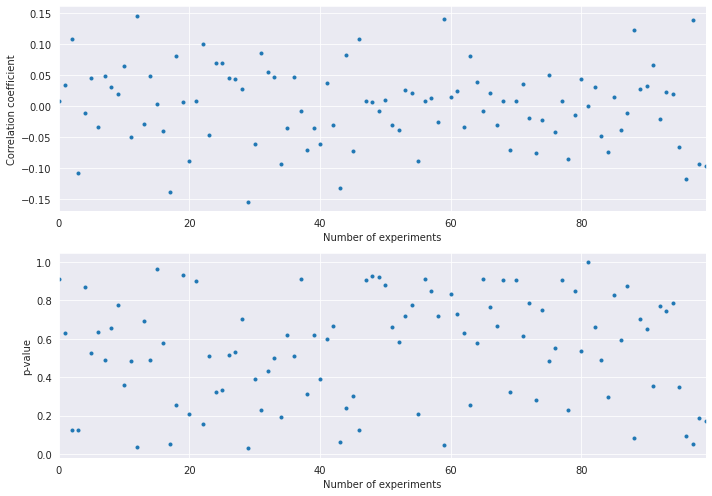

In [5]:
C = []
P = []
k = 100
for k in range( k ):

    X = norm.rvs( size = 200, random_state = rng )
    Y = norm.rvs( size = 200, random_state = rng )
   
    slope, intercept, r, p, se = stats.linregress(X, Y)
    C.append( r )
    P.append( p )

fig, axs = plt.subplots(2, 1, figsize = ( 10, 7 ))
axs[0].plot( C, '.' )
axs[0].set_xlim(0, k)
axs[0].set_xlabel('Number of experiments')
axs[0].set_ylabel('Correlation coefficient')
axs[0].grid(True)

axs[1].plot( P, '.' )
axs[1].set_xlim(0, k)
axs[1].set_ylabel('p-value')
axs[1].set_xlabel('Number of experiments')
fig.tight_layout()
plt.show()


#### 3-  Run each model, on the Iris data set, $rounds=k$ times using different train/test partitions and take the avegarge of their error rates. Plot and compare the models below using 0-1 metric on the predicted data and labelled data. Experiment with different number of $k$ rounds.

+ Use default definitions of the models.
+ For plotting: use train set proportion on the x-axis and probability of error on the y-axis

training SGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


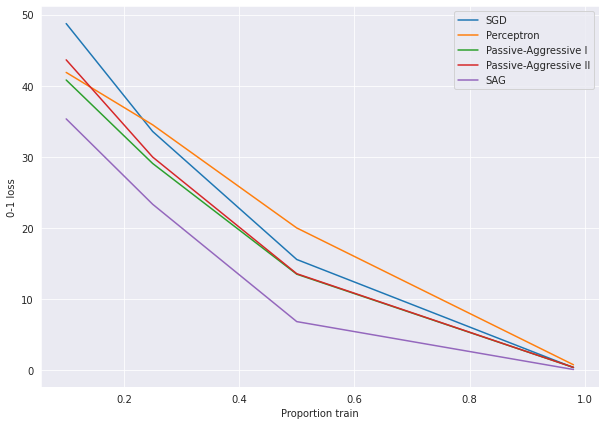

In [12]:
from sklearn import datasets as data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

iris = data.load_iris()
X = iris.data
y = iris.target

heldout = [ 0.90, 0.75, 0.50, 0.02 ] # suggested starting point. Modify to your liking.
rounds  = 30

classifiers = [
    ("SGD", SGDClassifier(max_iter=110)),
    ("Perceptron", Perceptron(max_iter=110)),
    (
        "Passive-Aggressive I",
        PassiveAggressiveClassifier(max_iter=110, loss="hinge", C=1.0, tol=1e-4),
    ),
    (
        "Passive-Aggressive II",
        PassiveAggressiveClassifier( max_iter=110, loss="squared_hinge", C=1.0, tol=1e-4 ),
    ),
    (
        "SAG",
        LogisticRegression(max_iter=110, solver="sag", tol=1e-1, C=1.0e4 / X.shape[0]),
    ),
]

xx = 1.0 - np.array(heldout)

plt.figure( figsize=( 10, 7 ) )

for name, clf in classifiers:
    print("training %s" % name)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=i, random_state = rng.integers( 124 )
            )
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append( metrics.zero_one_loss( y_test, y_pred, normalize = False ) )
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)


plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("0-1 loss")
plt.show()

#### 4a- Repeat the experiments on task 4, but on a single train/test split, for each model separatelyh and plot the model's error rates in a histogram.

#### 4b- Plot the training and test curves of the models.

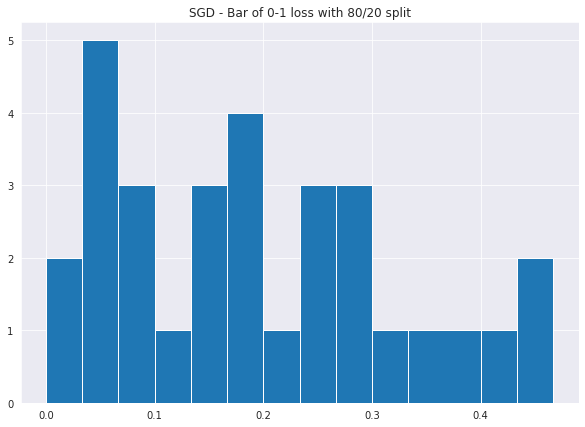

In [17]:
(name, clf) = classifiers[ 0 ]

yy = []
    
yy_ = []
for r in range( rounds ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = rng.integers( 124 ) )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    yy_.append( metrics.zero_one_loss( y_test, y_pred ) )

plt.figure( figsize=( 10, 7 ) )
plt.hist( yy_, bins = np.unique( yy_ )  )
plt.title("SGD - Bar of 0-1 loss with 80/20 split")
plt.show()

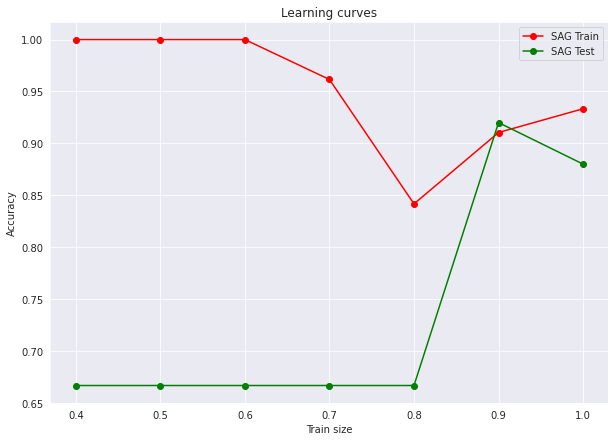

In [14]:
from sklearn.model_selection import learning_curve

train_sizes_abs, train_scores, test_scores = learning_curve(
    clf,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring= None,
    cv=2,
    n_jobs = 4
)

train_sizes=np.linspace(0.1, 1, 10)

plt.figure( figsize=( 10, 7 ) )
plt.plot(train_sizes, train_scores.mean(1), "o-", color="r", label="{0} Train".format(name))
plt.plot(train_sizes, test_scores.mean(1), "o-", color="g", label="{0} Test".format(name))
plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()